# Plotly

https://plotly.com/python/

In [5]:
!pip install dash

     ---------------------------------------- 10.2/10.2 MB 1.6 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
!pip install cufflinks

     -------------------------------------- 81.7/81.7 kB 916.7 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68718 sha256=b878e78e0b2e07fb5c7c5ca412b56e9b6b089000d197af65af0d4174d28b3bac
  Stored in directory: c:\users\samsung\appdata\local\pip\cache\wheels\32\f7\bd\3b5f431b9a740489de249dad87142f8ee000b7c6b6e8e58d54
Successfully built cufflinks



[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
!pip install wordcloud

     ------------------------------------ 153.3/153.3 kB 831.8 kB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
# !pip install plotly
# !pip install dash #reaktif web uygulamaları oluşturmak için geliştirilmiştir.dash board
# !pip install wordcloud #özellikle kelime bulutu nlp alanında kullanılabilir bir kelimenin önemi için
# !pip install cufflinks #pandas kütüphanesi ile çalışabilen bir kütüphanedir.
# !pip install missingno #kayıp verileri görselleştirmek için

In [9]:
from plotly.offline import init_notebook_mode, iplot, plot 

In [10]:
import numpy as np 
import pandas as pd
import seaborn as sns
import os 

# plotly

import plotly as py
init_notebook_mode(connected = True) #inline olarak görüntülemek için başlatıyoruz same to = %matplotlib inline

import plotly.graph_objs as go # veri görselleştirme için düşük düzey arayüz
import plotly.express as px # veri görselleştirme için üst düzey arayüz kısaca daha komplex bir görsel için daha az kod satırı

#!pip install dash
from dash import Dash, dcc, html, Input, Output #dcc interaktiflik kazandırıyor, 

# word cloud library
from wordcloud import WordCloud

# matplotlib
import matplotlib.pyplot as plt
import cufflinks as cf #pandas kütüphanesi ile çalışabilen bir kütüphanedir.
cf.go_offline() #grafikleri offline olarak yapıyoruz

# warnings
import warnings
warnings.filterwarnings("ignore")

from plotly.offline import init_notebook_mode, iplot, plot

## Submodules

plotly.express :Plotly Express, high-level interface for data visualization

plotly.graph_objects :Graph Objects, low-level interface to figures, traces and layout

plotly.subplots : Subplots, helper function for layout out multi-plot figures ""

plotly.figure_factory : Figure Factories, helper methods for building specific complex charts ""

plotly.io : I/O, low-level interface for displaying, reading and writing figures

plotly.colors: colorscales and utility functions

plotly.data: built-in datasets for demonstration, educational and test purposes

In [11]:
timesData = pd.read_csv("https://raw.githubusercontent.com/arnaudbenard/university-ranking/master/timesData.csv")

In [12]:
timesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [13]:
timesData.sample(10)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
2155,351-400,University of Crete,Greece,18.6,47.0,19.2,73.6,34.5,-,"14,650",26.9,5%,63 : 37,2016
2321,501-600,Chung-Ang University,South Korea,29.9,43.7,27.6,17.4,61.3,-,"13,015",17.4,17%,45 : 55,2016
717,116,Aarhus University,Denmark,35.7,66.4,54.6,71.6,69.7,55.3,"23,895",13.6,14%,54 : 46,2013
175,174,University of Nottingham,United Kingdom,46.8,74.8,44.1,52.5,38.4,49.0,"30,144",15.0,27%,54 : 46,2011
1475,74,University of Bristol,United Kingdom,43.7,76.6,44.7,85.1,42.1,58.9,"17,906",14.0,25%,53 : 47,2015
2112,301-350,Deakin University,Australia,22.4,76.9,21.9,66.8,30.0,-,"32,713",30.4,17%,60 : 40,2016
2418,601-800,Athens University of Economics and Business,Greece,13.4,39.2,18.8,31.2,66.5,-,"13,167",57.5,6%,47 : 53,2016
620,19,Northwestern University,United States of America,77.6,33.8,87.3,98.2,64.4,83.1,"18,334",13.8,15%,48 : 52,2013
2389,501-600,South China University of Technology,China,19.5,17.5,22.1,28.1,86.8,-,"41,438",17.7,3%,33 : 67,2016
1119,117,Technical University of Denmark,Denmark,38.9,77.4,26.9,78.7,98.7,51.6,"9,990",5.0,18%,27 : 73,2014


In [14]:
timesData.head(10)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,"18,812",11.8,34%,46 : 54,2011
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,"19,919",11.6,34%,46 : 54,2011
7,8,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,-,91.1,"36,186",16.4,15%,50 : 50,2011
8,9,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,"15,060",11.7,51%,37 : 63,2011
9,10,Yale University,United States of America,92.1,59.2,89.7,91.5,-,89.5,"11,751",4.4,20%,50 : 50,2011


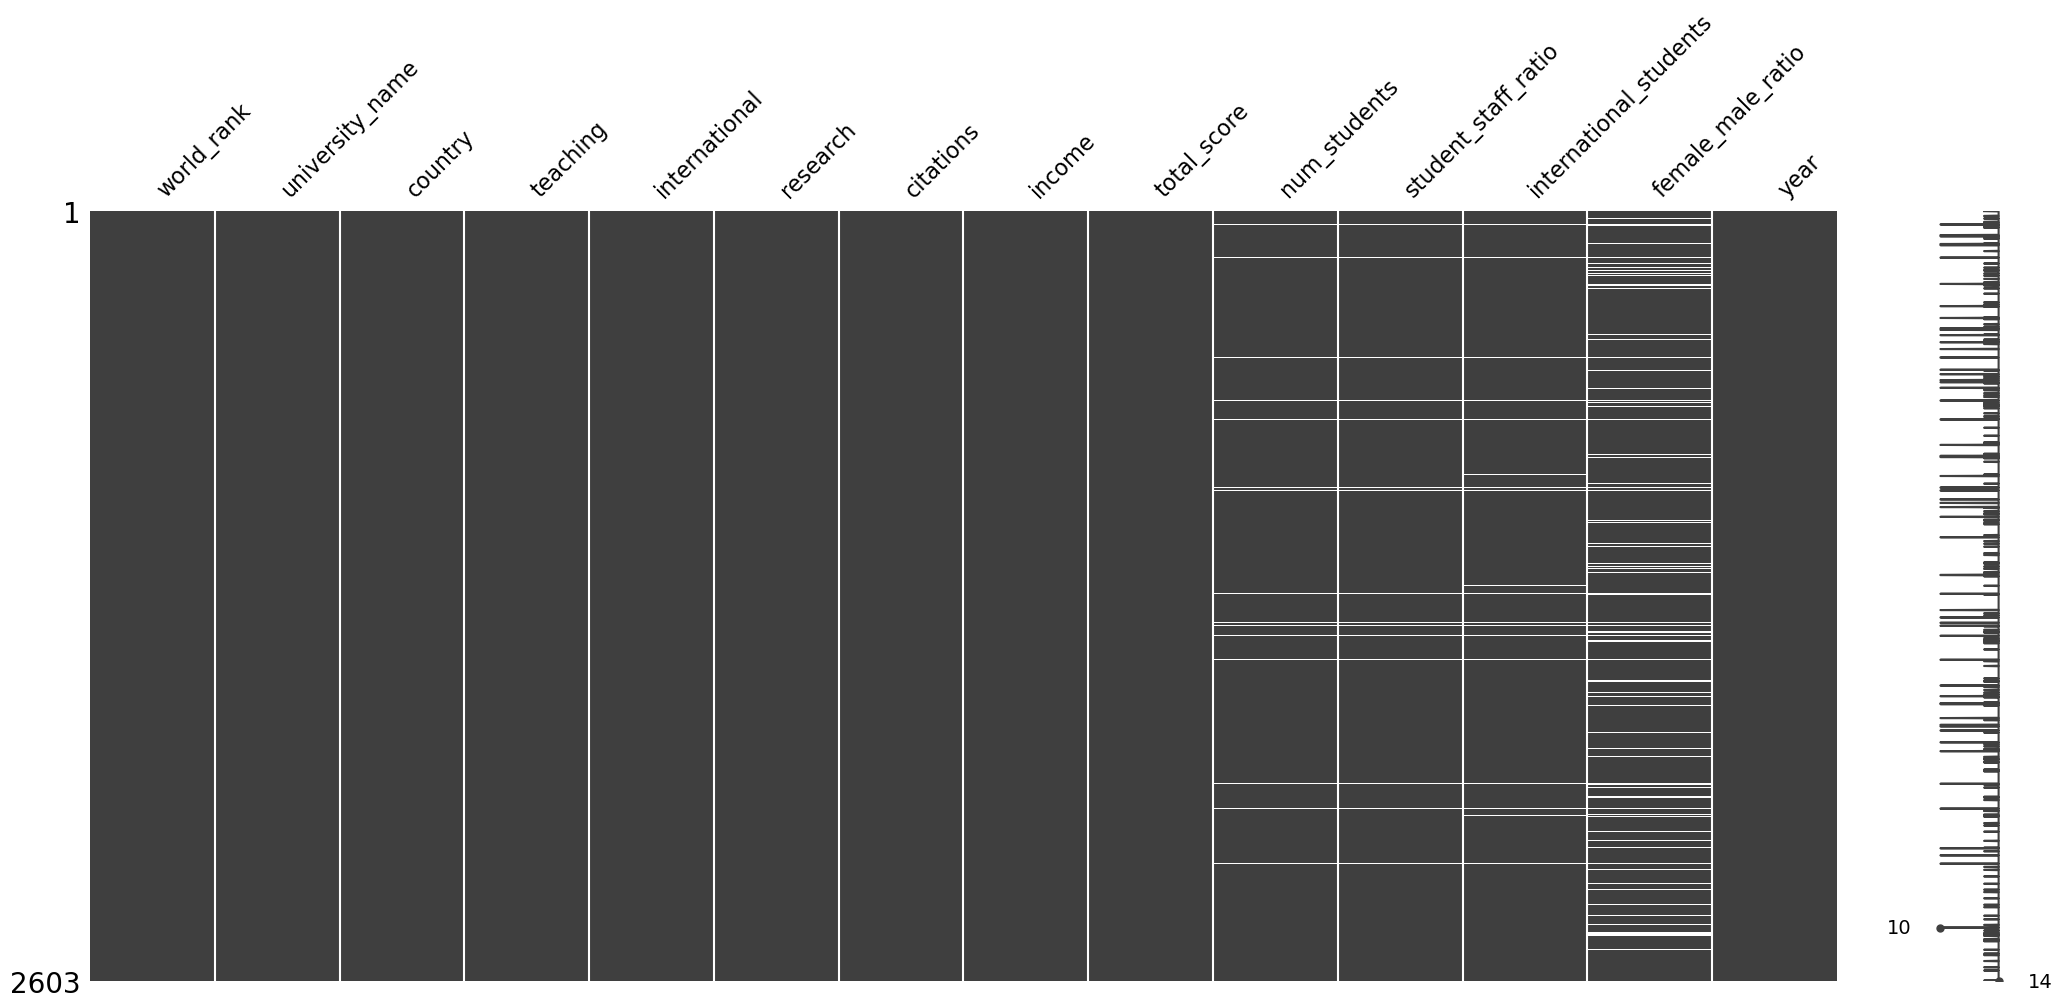

In [15]:
import missingno
missingno.matrix(timesData);

In [16]:
timesData.isnull().sum()

world_rank                  0
university_name             0
country                     0
teaching                    0
international               0
research                    0
citations                   0
income                      0
total_score                 0
num_students               59
student_staff_ratio        59
international_students     67
female_male_ratio         233
year                        0
dtype: int64

In [17]:
df = timesData.iloc[:100, :]
df.shape

(100, 14)

In [18]:
import plotly.graph_objs as go

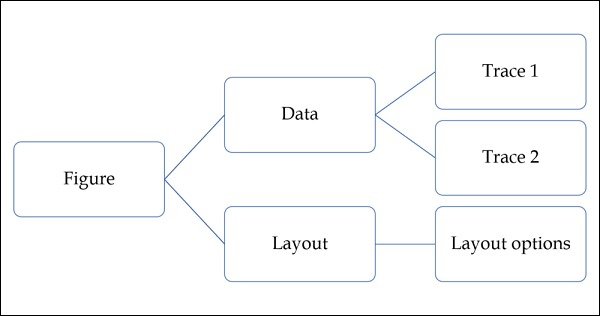

Bu görsel plotly de figure şemasını göstermektedir.

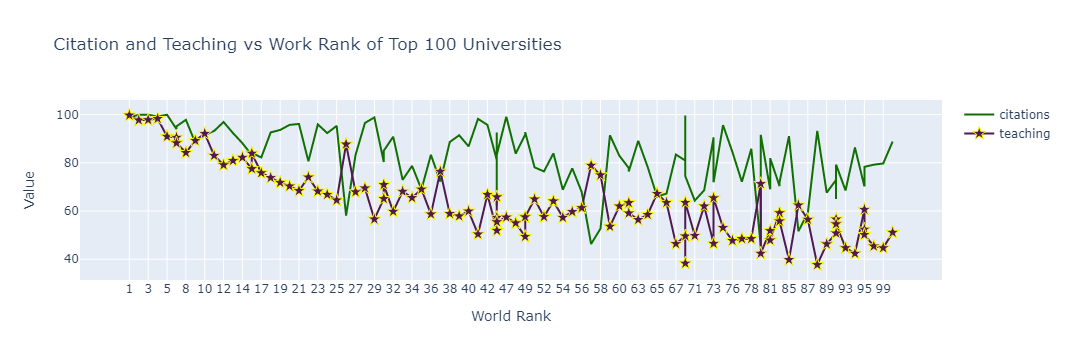

In [19]:
#plt.style.use("ggplot")
# creating trace 1

trace1 = go.Scatter(
                    x = df.world_rank,
                    y = df.citations,
                    mode = "lines",    # Bu dağılım izi için çizim modunu belirler. "mode=text" ise text'i yazdırır "text" öğeleri koordinatlarda görünür. 
                                       # Aksi takdirde, fareyle üzerine gelindiğinde "text" öğeleri görünür. 
                                       # 20'den az nokta varsa ve iz yığınlanmamışsa varsayılan değer "lines+markers"dir. Aksi takdirde, "lines".
                    name = "citations",
                    marker = dict(color = "rgb(16, 112, 2)"), # {"color" : "rgb(16, 112, 2)"}
                    text = df.university_name)
# creating trace 2
trace2 = go.Scatter(
                    x = df.world_rank,
                    y = df.teaching,
                    mode = "lines + markers",
                    name = "teaching",
                    marker = dict(color = "rgb(80,26,80)",
                                  size = 10,
                                  symbol = "star",
                                  line = dict(
                                         color = "yellow",
                                         width = 1),),
                    text = df.university_name)

data = [trace1, trace2]

layout = dict(title = "Citation and Teaching vs Work Rank of Top 100 Universities", #axes olarak düşünebiliriz
              xaxis = dict(title = "World Rank", ticklen = 5, tickcolor = "crimson", zeroline = False),
              yaxis = dict(title = "Value", ticklen = 5, tickcolor = "crimson", zeroline = False))

fig = dict(data = data, layout = layout)  #figure içine yukarıda tanımladığımız grafik değişkenlerini ve layout parametrelerini dict olarak verip 
iplot(fig)                                #iplot(fig) ile çizdiriyoruz.


## Zero Kullanımı

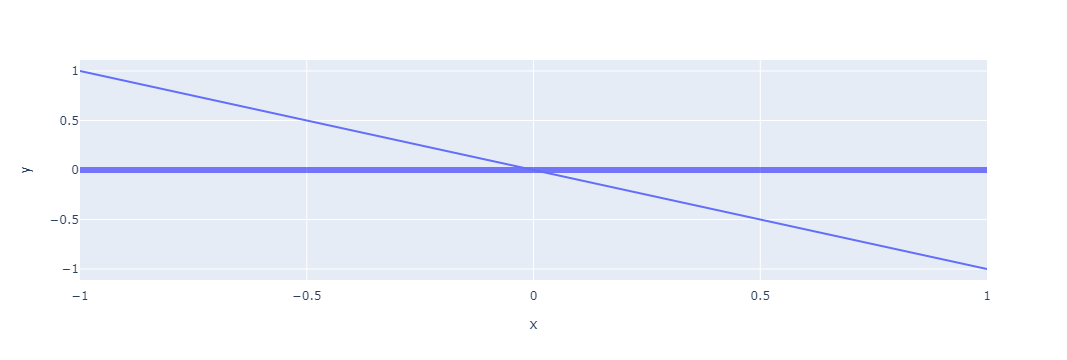

In [20]:
fig = px.line(y=[1, -1], x=[-1,1])

fig.update_xaxes(zeroline=False,linewidth=6, zerolinecolor='rgba(0,255,0,0.5)')
fig.update_yaxes(zeroline=True, zerolinewidth=6, zerolinecolor='rgba(0,0,255,0.5)')

fig.show()

## Ticklen Kullanımı

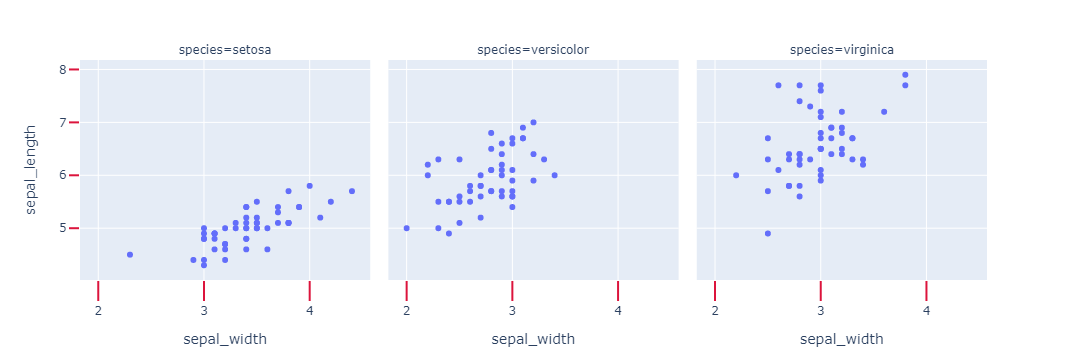

In [21]:
df = px.data.iris()

fig = px.scatter(df, x="sepal_width", y="sepal_length", facet_col="species")
fig.update_xaxes(ticks="outside", tickwidth=2, tickcolor='crimson', ticklen=20)
fig.update_yaxes(ticks="outside", tickwidth=2, tickcolor='crimson', ticklen=10, col=1)

fig.show()

In [22]:
dataset = sns.load_dataset('tips')

dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


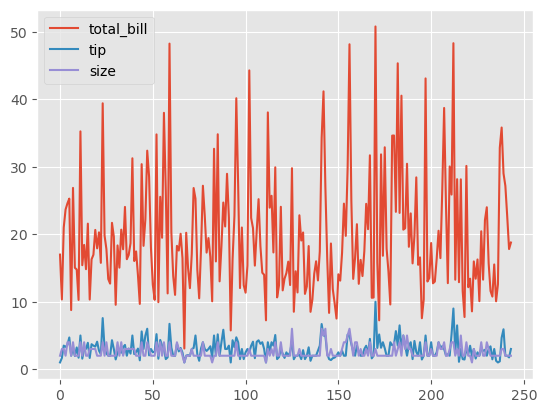

In [23]:
plt.style.use('ggplot')
dataset2 = dataset[["total_bill", "tip", "size"]]
dataset2.plot();

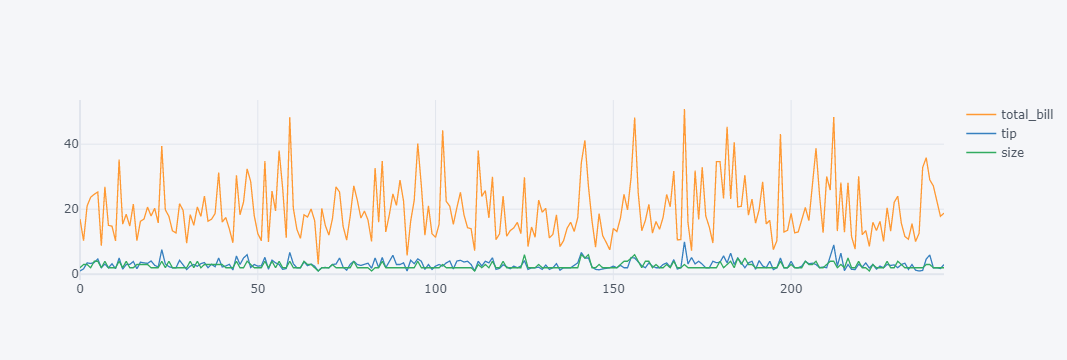

In [24]:
plt.style.use('ggplot')
dataset2 = dataset[["total_bill", "tip", "size"]]
dataset2.iplot();

In [25]:
# prepare data drames
df2014 = timesData[timesData.year == 2014].iloc[:100, :]  # iloc ile indexleme yaparak istediğimiz yıllara ait verileri yeni df olarak oluşturuyoruz.  
df2015 = timesData[timesData.year == 2015].iloc[:100, :]
df2016 = timesData[timesData.year == 2016].iloc[:100, :]

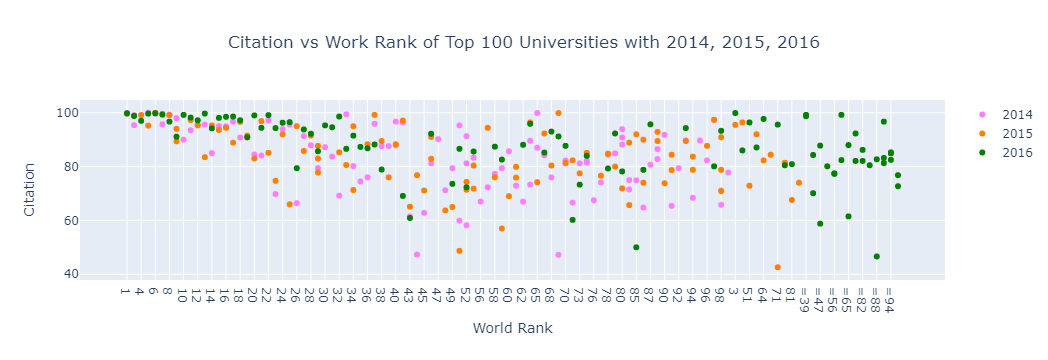

In [26]:
# creating trace 1
trace1 = go.Scatter(
                    x = df2014.world_rank,
                    y = df2014.citations,
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = "rgb(255,128,255)"),
                    text = df2014.university_name)
# creating trace 2
trace2 = go.Scatter(
                    x = df2015.world_rank,
                    y = df2015.citations,
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = "rgb(255,128,2)"),
                    text = df2015.university_name)
# creating trace 3
trace3 = go.Scatter(
                    x = df2016.world_rank,
                    y = df2016.citations,
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = "green"),
                    text = df2016.university_name)
data = [trace1, trace2, trace3]

layout = dict(title = "Citation vs Work Rank of Top 100 Universities with 2014, 2015, 2016",title_x = 0.5, title_y = 0.9,
             xaxis = dict(title = "World Rank"),
             yaxis = dict(title = "Citation"))

fig = dict(data = data, layout = layout)
iplot(fig)

## Bar Charts

seaborn da olduğu gibi plotlyde de içine embed veri setleri var. Bunlardan çalışalım biraz ülkelerin popülasyonu ile ilgili bir veri seti çağıracağız.

data setleri hakkında kısa bilgi için "http://plotly.github.io/datasets/

Datamız yıllara sari olarak ülke bilgilerini içeriyor

LifeExp=Ortalama Ömür

pop = poülasyon

gdpPercap = kişi başı gelir yıllık yada kişi alım gücü

iso_num = ülkenin numarası

In [27]:
gm = px.data.gapminder()
gm

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


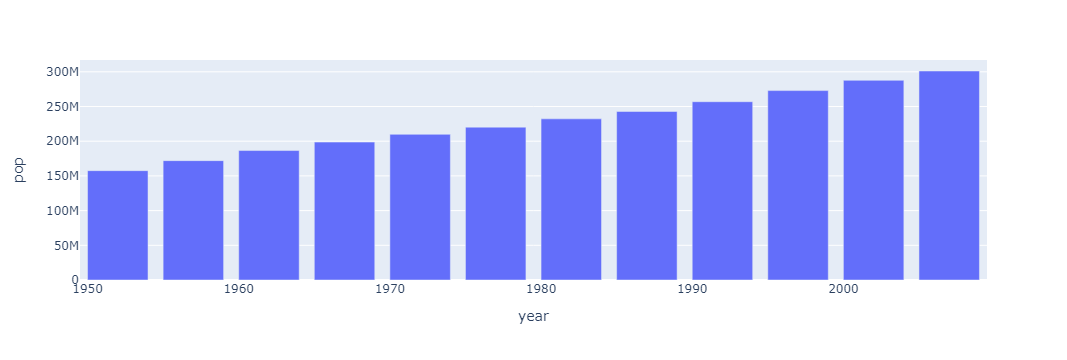

In [28]:
gm_usa = px.data.gapminder().query("country =='United States'")
px.bar(gm_usa, x = "year", y = "pop")

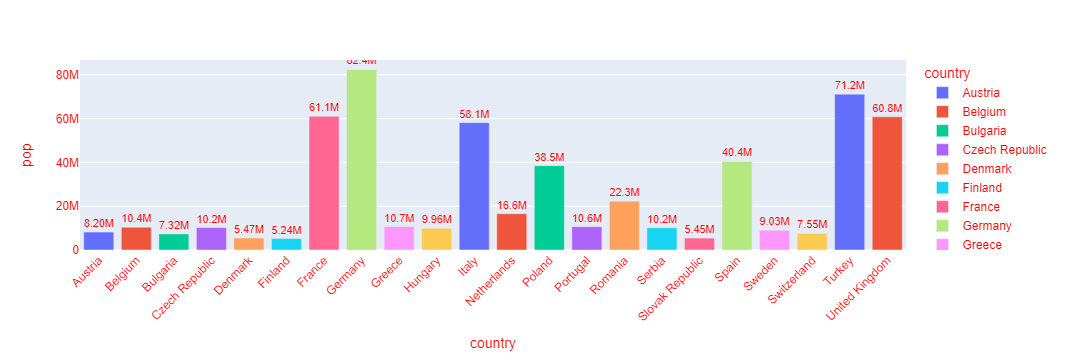

In [29]:
df_europe = px.data.gapminder().query("continent =='Europe' and year == 2007 and pop > 5.e6" )
fig = px.bar(df_europe, y= "pop", x= "country", text = "pop", color ="country")

fig.update_traces(textposition = "outside", texttemplate = "%{text:.3s}", textfont_size=12) #int, s, f verdiğimizde type göre işlem yapıyor

fig.update_layout(xaxis_tickangle = -45,
                  font_family="Arial",
                  font_color="red",
                  font_size = 12)

## Pie Chart

In [30]:
df2016 = timesData[timesData.year == 2016].iloc[:7,:]

df = df2016.num_students
df.count()

7

In [31]:
df1 = (df.str.replace(",", "")).astype("float")

In [32]:
df2 = list((df.str.replace(",", "")).astype("float"))

In [33]:
pie_list =[float(each.replace(",", ""))for each in df2016.num_students]
pie_list

[2243.0, 19919.0, 15596.0, 18812.0, 11074.0, 20152.0, 7929.0]

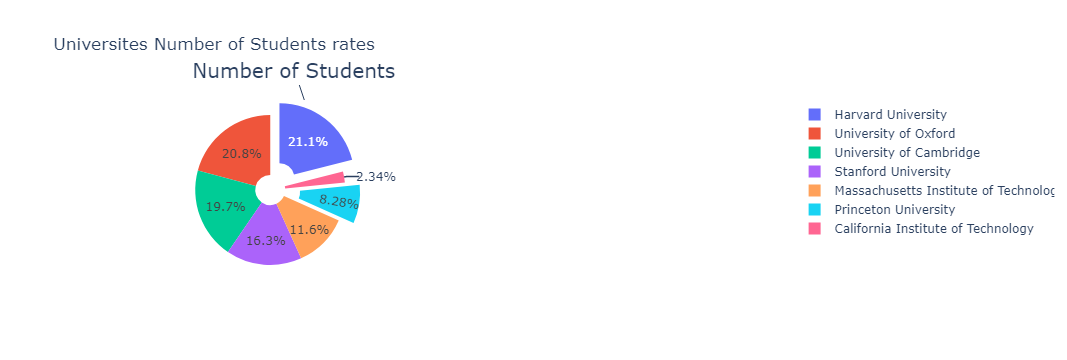

In [34]:
labels = df2016.university_name
# figure
fig = {
    "data" : [
        {
            "values" : pie_list,
            "labels" : labels,
            "domain" : {"x": [0, .5]},
            "name" : "Number Of Students Rates",
            "hoverinfo" : "label + percent",
            "hole" : .2,
            "type" : "pie",
            "pull" : [0,0,0,0,0, 0.2, 0.2] #exploded
        },
    ],
    "layout" : {
        "title" : "Universites Number of Students rates",
        "annotations" : [
            {"font" : {"size" : 20},
             "text" : "Number of Students",
             "x" : 0.3,
             "y" : 1
            },
        ]
    }
}
iplot(fig)

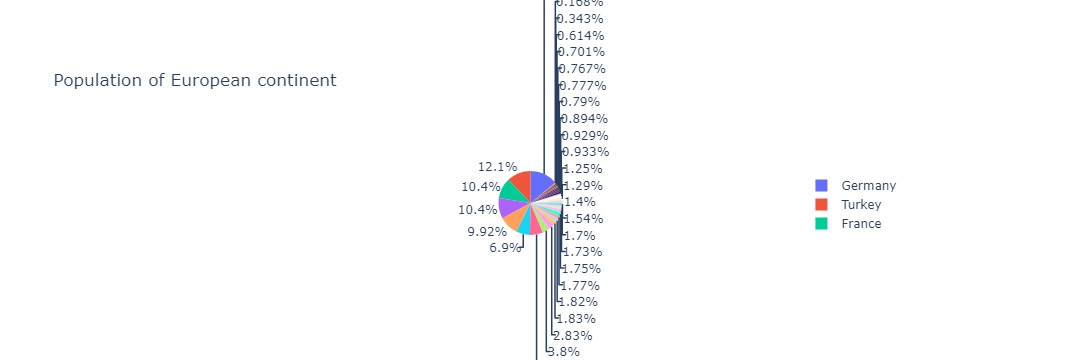

In [35]:
df = px.data.gapminder().query("year == 2007").query("continent == 'Europe'")
df.loc[df['pop'] < 2.e6, 'country'] = 'Other countries' # Represent only large countries
fig = px.pie(df, values='pop', names='country', title='Population of European continent')
fig.show()

## Bubble Chart

In [36]:
df2016 = timesData[timesData.year == 2016].iloc[:20,:]
num_students_size = [float(each.replace(",", ".")) for each in df2016.num_students]
num_students_size

[2.243,
 19.919,
 15.596,
 18.812,
 11.074,
 20.152,
 7.929,
 15.06,
 18.178,
 14.221,
 15.128,
 11.751,
 36.186,
 26.607,
 25.055,
 38.206,
 20.376,
 21.424,
 66.198,
 15.172]

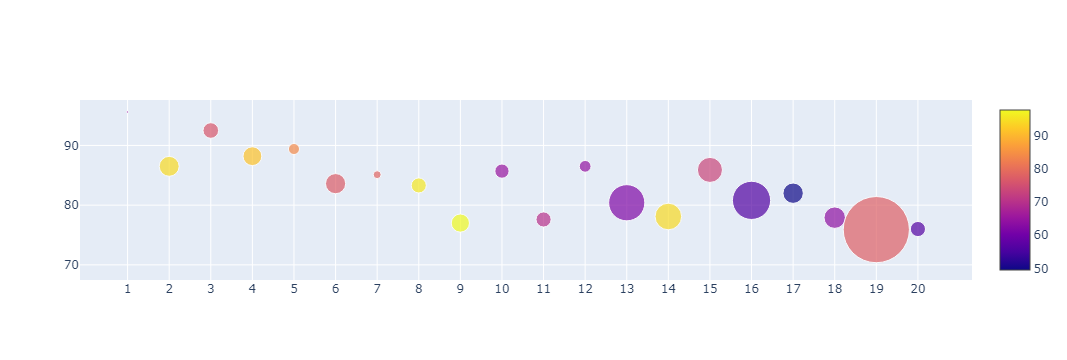

In [37]:
df2016.international
international_color = [float(each) for each in df2016.international]
data = [
    {
        "y" : df2016.teaching,
        "x" : df2016.world_rank,
        "mode" : "markers",
        "marker" : {
            "color" : international_color,
            "size" : num_students_size,
            "showscale" : True
        },
        "text" : df2016.university_name
    }
]
iplot(data)

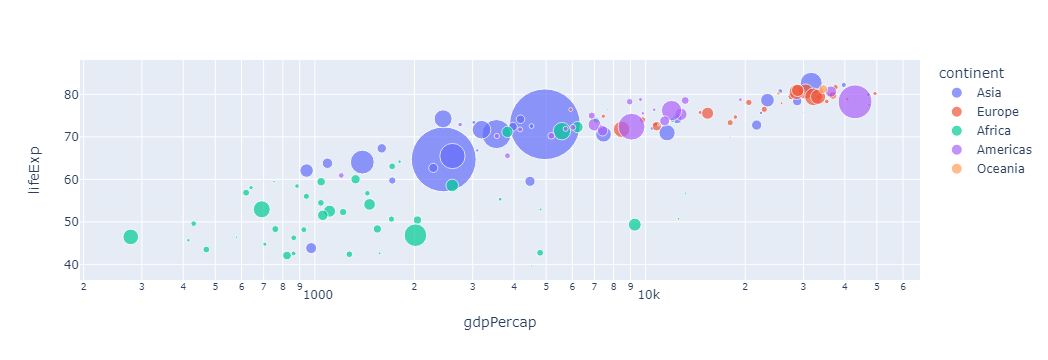

In [38]:
df = px.data.gapminder()

fig = px.scatter(df.query("year==2007"), x = "gdpPercap", y = "lifeExp",
                size = "pop", color = "continent", 
                 hover_name = "country", log_x = True, size_max = 50)

fig

In [39]:
timesData.head(1)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011


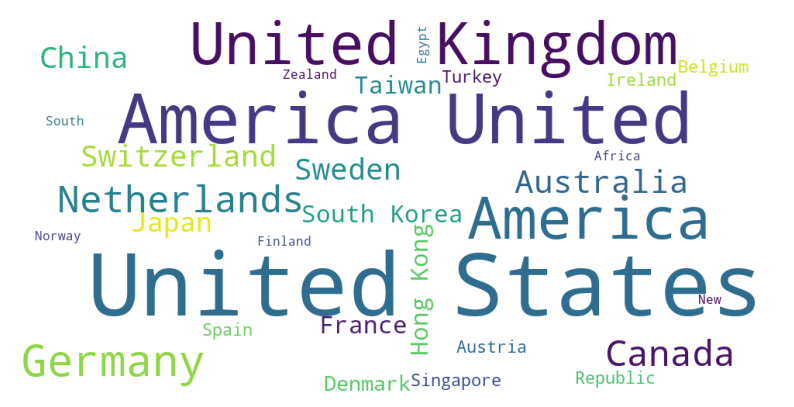

In [40]:
x2011 = timesData.country[timesData.year == 2011]
plt.subplots(figsize = (10, 10))
wordcloud = WordCloud(background_color= "white",
                      width = 1000,
                      height= 500).generate(" ".join(x2011))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("graph.png") # save graph in your computer

plt.show()

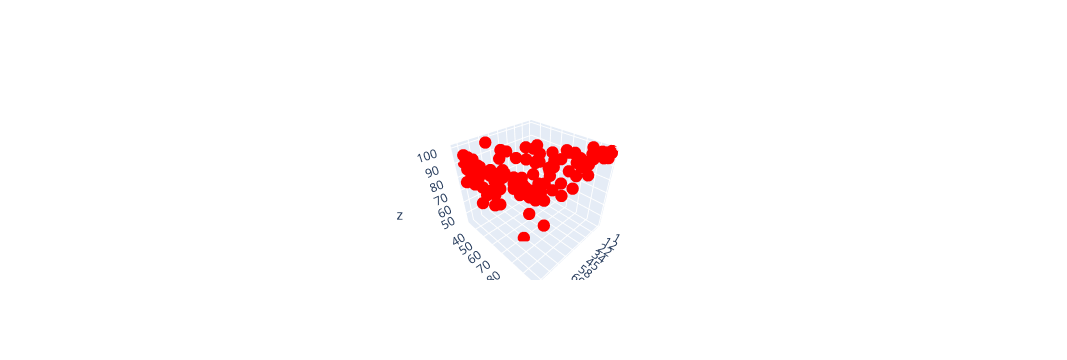

In [41]:
trace1 = go.Scatter3d(
                    x = df2015.world_rank,
                    y = df2015.research,
                    z = df2015.citations,
                    mode = "markers",
                    marker = dict(size = 7, color = "rgb(255, 0, 0)",))

data = [trace1]
layout = go.Layout(
                )
fig = go.Figure(data = data, layout = layout)
iplot(fig)